In [1]:
#Приложение собирает данные из социальной сети Вконтакте. 
#Для начала нужно ввести id пользователя сети,
#Далее нужно нажать кнопку "Построить диаграмму", если id существует и профиль открытый, то будет отображена круговая диаграмма
#Иначе появится уведомление, что id не подходит

In [2]:
#Примеры возможных id
#585752063, 9346713, 948612, 294212542, 311416539,
#324119520, 582796306, 587208107, 591747279, 607053895, 
#607373480,632361398, 674945059, 9211862, 19642848
#1010053 - закрытый
#avdoshin1953 - нечисловой

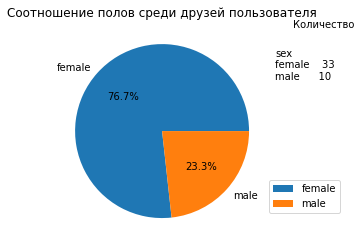

In [4]:
import requests
import json
import math
import pandas as pd
import numpy as np
from tkinter import *
from tkinter import messagebox
import matplotlib
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, 
NavigationToolbar2Tk)
import matplotlib.pyplot as plot
from tkinter import scrolledtext

window = Tk() 

window.title('Статистика друзей пользователя')  
window.geometry('500x500')  


lbl = Label(window, text="Введите id профиля ")  
lbl.pack()  

height_tf = Entry(window,width=25)  
height_tf.pack()  
    
kh = 0
label_data = None
def ft():
    try:
        token = " " #указать токен
        height = str(height_tf.get())
        # получаем числовой id
        id_chislovoy = requests.get('https://api.vk.com/method/users.get', 
                             params={
                                'access_token':token,
                                'v':5.92,
                                'user_id': height,
                                 'fields': "id"
            }).json()['response']
        id_chislo = pd.DataFrame(id_chislovoy)
        id_chislo = id_chislo['id'][0]
        #друзья пользователя
        id_p = requests.get('https://api.vk.com/method/friends.get', 
                             params={
                                'access_token':token,
                                'v':5.92,
                                'user_id': id_chislo,
                                 'fields': "sex, city, country"
            }).json()['response']
        friend_info = id_p
        friend_table = pd.DataFrame([friend_info["items"][0]])

        for i in range(1,friend_info['count']):
            friend_table=friend_table.append(friend_info['items'][i], ignore_index=True)    
        friend_table = friend_table.replace({'sex':{0:"not specified",1:"female", 2:"male", None: " "}})
        viv=friend_table.groupby('sex').size()
        

        plot.figure(facecolor='white')
        friend_table.groupby('sex').size().plot(kind = 'pie', title = 'Соотношение полов среди друзей пользователя', autopct='%.1f%%')
        plot.legend(bbox_to_anchor=(0.97, 0.3))
        plot.ylabel(" ")
        plot.text(1.5, 1.2, "Количество")
        plot.text(1.3, 0.6, f'{viv.to_string()}')
        
        plot.savefig("q1.png")
        
        global label_data
        if label_data is None:
            img = PhotoImage(file="q1.png")
            label_data = Label(window, image=img)
            label_data.configure(image=img)
            label_data.image_ref = img
            label_data.pack()
        else:
            label_data.pack_forget()
            label_data = None
            img = PhotoImage(file="q1.png")
            label_data = Label(window, image=img)
            label_data.configure(image=img)
            label_data.image_ref = img
            label_data.pack()
        
    except KeyError:
        if label_data is None:
            messagebox.showinfo("Уведомление", 'Неподходящий id профиля, построение диаграммы невозможно.')
        else:
            label_data.pack_forget()
            label_data = None
            messagebox.showinfo("Уведомление", 'Неподходящий id профиля, построение диаграммы невозможно.')
    except IndexError:
        messagebox.showinfo("Уведомление", 'Неподходящий id профиля, построение диаграммы невозможно.')        
    except AttributeError:
        return    
    
    

    

btn = Button(window, text="Построить диаграмму", command=ft,width=25)  
btn.pack()

window.mainloop()